In [3]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

In [2]:
pip install powerlaw

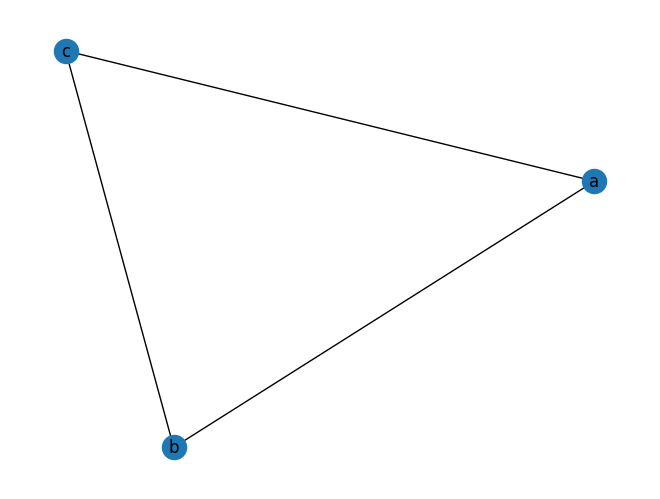

In [4]:
g = nx.Graph()
g.add_node("a")
g.add_edge("a", "b")
g.add_edge("a", "c")
g.add_edge("b", "c")
nx.draw(g ,with_labels=True)

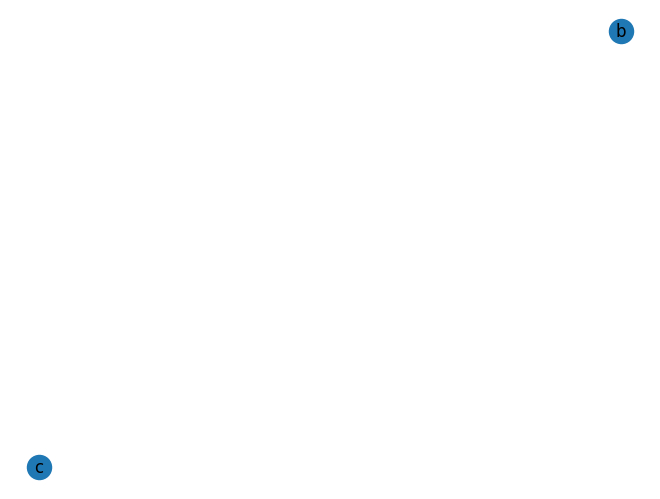

In [5]:
g.remove_node("a")
g.remove_edge("b", "c")
#re-draw the graph
nx.draw(g, with_labels=True)


In [9]:
g = nx.read_edgelist("/content/network.csv", delimiter=",", nodetype=int)


In [11]:
for n in g.nodes():
  pass




In [12]:
for n in g.nodes():
  pass


In [13]:
g.number_of_nodes()


333

In [14]:
g.number_of_edges()

2519

In [15]:
g.is_directed()

False

#өгөгдсөн оройн зэрэг

In [16]:
g.degree(1)

16

#дундаж оройн зэрэг


In [17]:
sum(dict(g.degree()).values())/float(len(g))


15.12912912912913

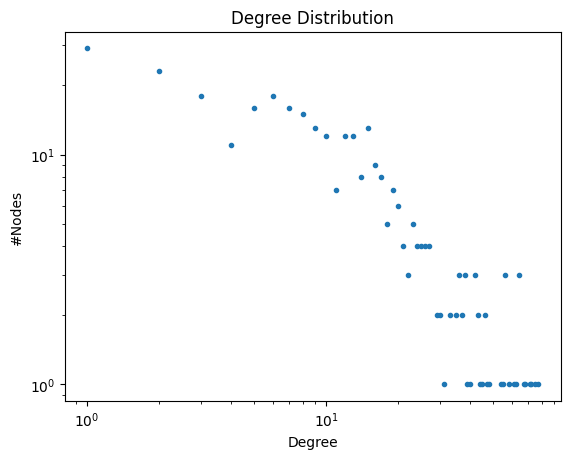

In [18]:
hist = nx.degree_histogram(g)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [37]:
def plot_dist(G):
    M = nx.to_scipy_sparse_array(G)
    degrees = [d for n, d in G.degree()]  # Extract node degrees
    xmin = min(degrees) if degrees else 1
    indegrees = np.array(M.sum(0)).flatten() # Convert sparse matrix to array
    degree = np.bincount(indegrees)

    # Fit power-law distribution
    fit = powerlaw.Fit(np.array(degree) + 1, fit_method='KS', xmin=xmin, xmax=max(degree) - 1)


    fig = plt.figure(figsize=(16, 6))

    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)), degree, 'b.')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim((xmin, max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')

    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')

    plt.tight_layout()
    plt.show()


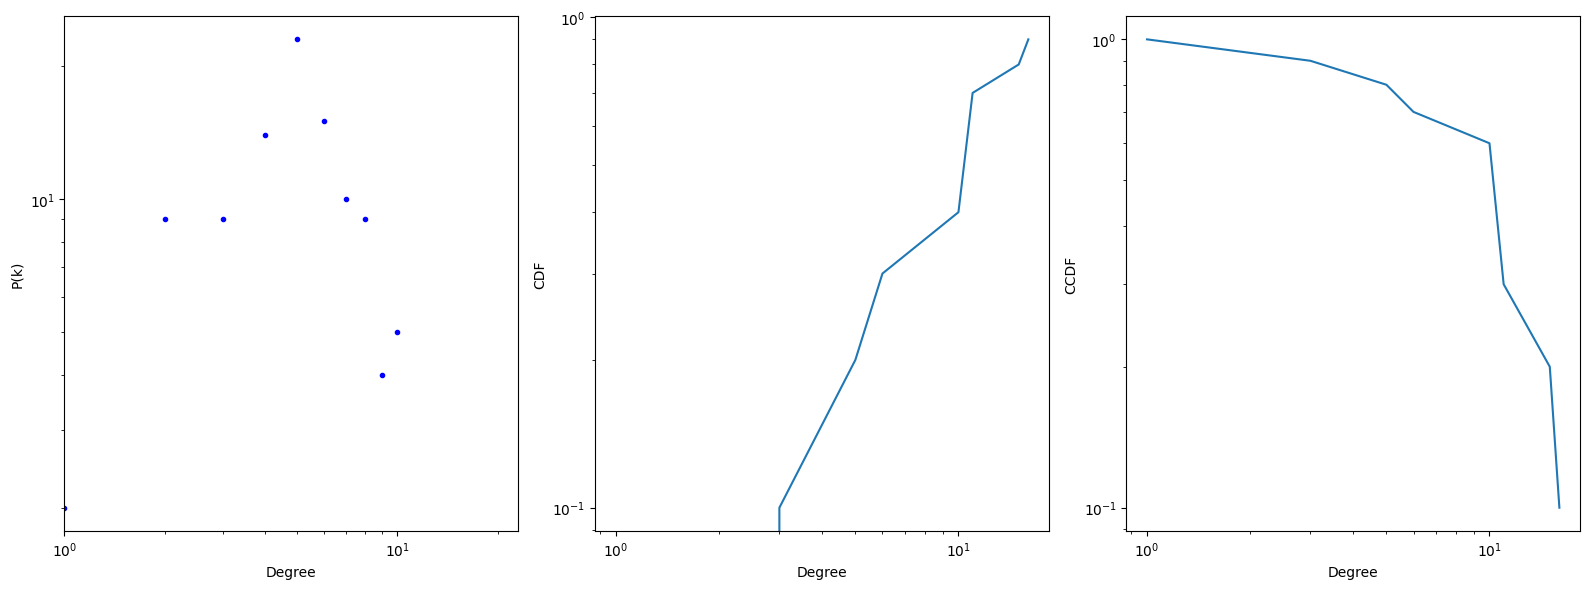

In [38]:
# G = nx.erdos_renyi_graph(100, 0.05)  # Generate a random graph
plot_dist(G)

In [40]:
list(g.neighbors(1)) # obtain the list of neighobors for node 0


[346, 315, 280, 53, 92, 73, 194, 322, 133, 48, 299, 54, 88, 119, 126, 236]

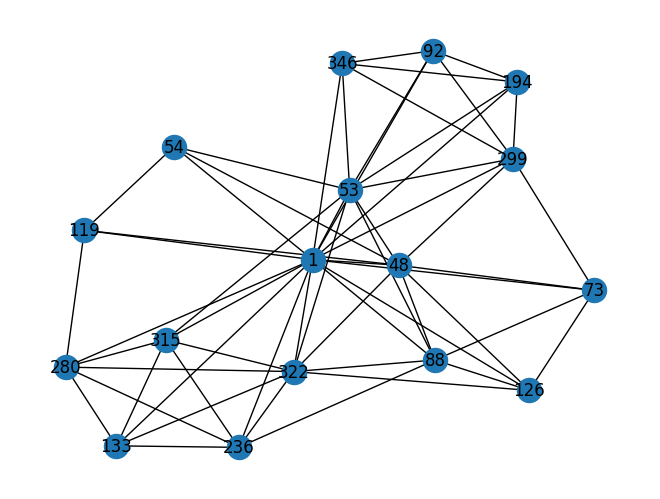

In [43]:
ego = nx.ego_graph(g, 1)
 # ego network of the node 0

nx.draw(ego, with_labels=True)


#connected components

In [44]:
nx.number_connected_components(g)


5

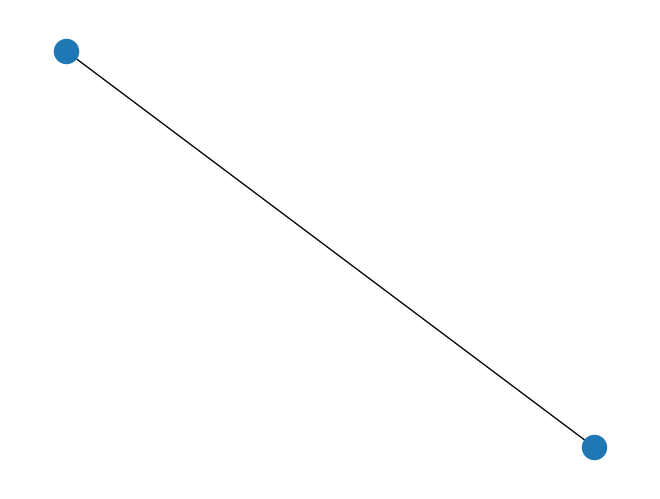

In [45]:
comps = list(nx.connected_components(g)) # get a list of connected components (for decreas
comp_1 = nx.subgraph(g, comps[1]) # build a subgraph on the second component
nx.draw(comp_1)

#short paths

In [47]:
nx.shortest_path(g, source=1, target=30)

[1, 48, 30]

In [48]:
nx.shortest_path_length(g, source=1, target=30)


2

#diametr of network

In [51]:
nx.diameter(g.subgraph(comps[0])) # we compute the diameter on the giant component

11

#metric stats

In [52]:
nx.density(g)


0.045569666051593766

In [54]:
nx.triangles(g)[1] # count the triangles each node is involved in (and access the value of


41

In [55]:
nx.clustering(g)[1] # compute the local clustering coefficient for all nodes (and access t


0.3416666666666667

In [56]:
nx.average_clustering(g) # compute the global clustering coefficient


0.5082445417696639